# WEEK 4

## EX1

### Q1 
Select the features 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS' to use for building the model. Plot Emission values with respect to 

Engine size. 

• split the data into training and test sets (70:30) to create a model using training set, 
evaluate the model using test set, and use model to predict unknown value. 

• Try to use a polynomial regression with the dataset of degree – 3, 4 & 5. Verify the 
accuracy by calculating Mean absolute error, Residual sum of squares, R2-score and 
comment on which model is the best.

In [3]:
import pandas as pd
df=pd.read_csv("FuelConsumption.csv")
df

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1062,2014,VOLVO,XC60 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1063,2014,VOLVO,XC60 AWD,SUV - SMALL,3.2,6,AS6,X,13.2,9.5,11.5,25,264
1064,2014,VOLVO,XC70 AWD,SUV - SMALL,3.0,6,AS6,X,13.4,9.8,11.8,24,271
1065,2014,VOLVO,XC70 AWD,SUV - SMALL,3.2,6,AS6,X,12.9,9.3,11.3,25,260


In [4]:
df.isna().sum()

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

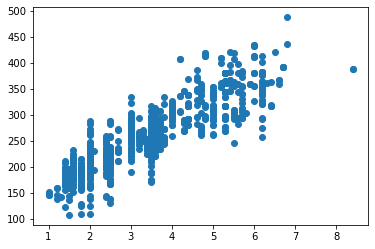

In [11]:
import matplotlib.pyplot as plt
df = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]

plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'])



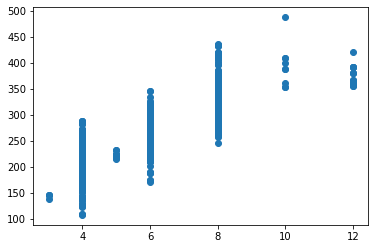

In [13]:
plt.scatter(df['CYLINDERS'], df['CO2EMISSIONS'])


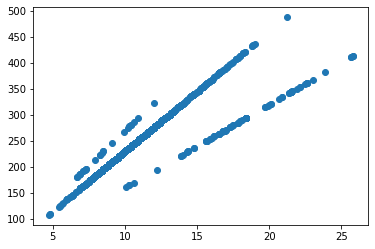

In [14]:
plt.scatter(df['FUELCONSUMPTION_COMB'], df['CO2EMISSIONS'])

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
X = df[['FUELCONSUMPTION_COMB','ENGINESIZE','CYLINDERS']]
y = df['CO2EMISSIONS']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model=LogisticRegression(max_iter=20000000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
accu=accuracy_score(y_test, y_pred)
print('Accuracy = ',accu)

Accuracy =  0.1059190031152648


In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def evaluate_polynomial_model(degree):
    poly=PolynomialFeatures(degree=degree)
    X_poly_train=poly.fit_transform(X_train)
    X_poly_test=poly.transform(X_test)
    model=LinearRegression()
    model.fit(X_poly_train, y_train)
    y_pred = model.predict(X_poly_test)
    mae = mean_absolute_error(y_test, y_pred)
    rss = np.sum((y_test - y_pred) ** 2)
    r2 = r2_score(y_test, y_pred)
    
    return mae, rss, r2

for degree in [3,4,5]:
    mae, rss, r2 = evaluate_polynomial_model(degree)
    print(f"Degree {degree}:")
    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  Residual Sum of Squares (RSS): {rss:.2f}")
    print(f"  R² Score: {r2:.2f}")
    print()



Degree 3:
  Mean Absolute Error (MAE): 10.23
  Residual Sum of Squares (RSS): 87722.81
  R² Score: 0.93

Degree 4:
  Mean Absolute Error (MAE): 9.65
  Residual Sum of Squares (RSS): 82952.60
  R² Score: 0.94

Degree 5:
  Mean Absolute Error (MAE): 8.26
  Residual Sum of Squares (RSS): 74297.16
  R² Score: 0.94



degree 5 is best

## EX2

### Q1 Perform the preprocessing if required, scale the train and test data using standard scaler.

In [3]:
import pandas as pd
df=pd.read_csv("Housing.csv")
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [42]:
df.isna().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [45]:
from sklearn.preprocessing import StandardScaler
X=df.drop(columns=['price','furnishingstatus','mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea'])
y=df['price']
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)
print(X_scaled)


[[ 1.04672629  1.40341936  1.42181174  1.37821692  1.51769249]
 [ 1.75700953  1.40341936  5.40580863  2.53202371  2.67940935]
 [ 2.21823241  0.04727831  1.42181174  0.22441013  1.51769249]
 ...
 [-0.70592066 -1.30886273 -0.57018671 -0.92939666 -0.80574124]
 [-1.03338891  0.04727831 -0.57018671 -0.92939666 -0.80574124]
 [-0.5998394   0.04727831 -0.57018671  0.22441013 -0.80574124]]


### Q2 Split the dataset into train size of 70% and test size of 30% and Apply the Ridge and Lasso regression and fit the model containing all independent variables. 

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
test_data = pd.concat([X_test, y_test], axis=1)
test_data.to_csv('HousePriceTest.csv', index=False)

### Q3 Make predictions on test data “HousePriceTest.csv” and tabulate performance of both models on unseen data.

In [47]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
ridge = Ridge(alpha=1.0)
lasso = Lasso(alpha=0.01)
ridge.fit(X_train_scaled, y_train)
lasso.fit(X_train_scaled, y_train)
ridge_pred = ridge.predict(X_test_scaled)
lasso_pred = lasso.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_pred)
lasso_mse = mean_squared_error(y_test, lasso_pred)

ridge_r2 = r2_score(y_test, ridge_pred)
lasso_r2 = r2_score(y_test, lasso_pred)
# Tabulate the performance of both models
performance = pd.DataFrame({
    'Model': ['Ridge', 'Lasso'],
    'MSE': [ridge_mse, lasso_mse],
    'R^2': [ridge_r2, lasso_r2]
})

print(performance)

# Output the performance metrics of both models
print("Performance Metrics on Test Data:")
print(performance)


   Model           MSE       R^2
0  Ridge  2.044264e+12  0.525295
1  Lasso  2.044165e+12  0.525318
Performance Metrics on Test Data:
   Model           MSE       R^2
0  Ridge  2.044264e+12  0.525295
1  Lasso  2.044165e+12  0.525318
